In [1]:
import pandas as pd
import plotly.express as px

In [2]:
df_MAE = pd.read_excel("C:/Users/thiag/Documents/1 -Mestrado/SprintFinal/Defesa/Results/consolidado/MAE/boot.xlsx")
df_MAE["ci_inf"] = (df_MAE["mean"] - df_MAE["sup"])
df_MAE["ci_sup"] = (df_MAE["inf"] - df_MAE["mean"])
df_MAE.rename(columns={"mean":"MAE"},inplace=True)
df_MAE.head()

,file,n_obs,n_ma,n_fold_ts,n_ts,model,MAE,sup,inf,ci_inf,ci_sup
0,MAE & n_obs__100 & n_ma__0 & n_fold_ts__85 & n...,100,0,85,2,ARIMA,0.735014,0.693282,0.780176,0.041732,0.045162
1,MAE & n_obs__100 & n_ma__0 & n_fold_ts__85 & n...,100,0,85,2,VAR,0.779155,0.740454,0.827433,0.038702,0.048278
2,MAE & n_obs__100 & n_ma__0 & n_fold_ts__85 & n...,100,0,85,2,VEC,0.847400,0.799527,0.902322,0.047873,0.054922
3,MAE & n_obs__100 & n_ma__0 & n_fold_ts__85 & n...,100,0,85,3,ARIMA,0.747558,0.700584,0.788387,0.046973,0.040830
4,MAE & n_obs__100 & n_ma__0 & n_fold_ts__85 & n...,100,0,85,3,VAR,0.781117,0.734908,0.829889,0.046209,0.048772


In [3]:
df_MSE = pd.read_excel("C:/Users/thiag/Documents/1 -Mestrado/SprintFinal/Defesa/Results/consolidado/MSE/boot.xlsx")
df_MSE["ci_inf"] = (df_MSE["mean"] - df_MSE["sup"])
df_MSE["ci_sup"] = (df_MSE["inf"] - df_MSE["mean"])
df_MSE.rename(columns={"mean":"MSE"},inplace=True)
df_MSE.head()

,file,n_obs,n_ma,n_fold_ts,n_ts,model,MSE,sup,inf,ci_inf,ci_sup
0,MSE & n_obs__100 & n_ma__0 & n_fold_ts__85 & n...,100,0,85,2,ARIMA,0.889598,0.801108,1.009878,0.088489,0.120280
1,MSE & n_obs__100 & n_ma__0 & n_fold_ts__85 & n...,100,0,85,2,VAR,0.989523,0.889619,1.113355,0.099904,0.123832
2,MSE & n_obs__100 & n_ma__0 & n_fold_ts__85 & n...,100,0,85,2,VEC,1.172018,1.044563,1.314023,0.127455,0.142006
3,MSE & n_obs__100 & n_ma__0 & n_fold_ts__85 & n...,100,0,85,3,ARIMA,0.938771,0.848496,1.037819,0.090275,0.099048
4,MSE & n_obs__100 & n_ma__0 & n_fold_ts__85 & n...,100,0,85,3,VAR,1.030927,0.935137,1.163499,0.095790,0.132573


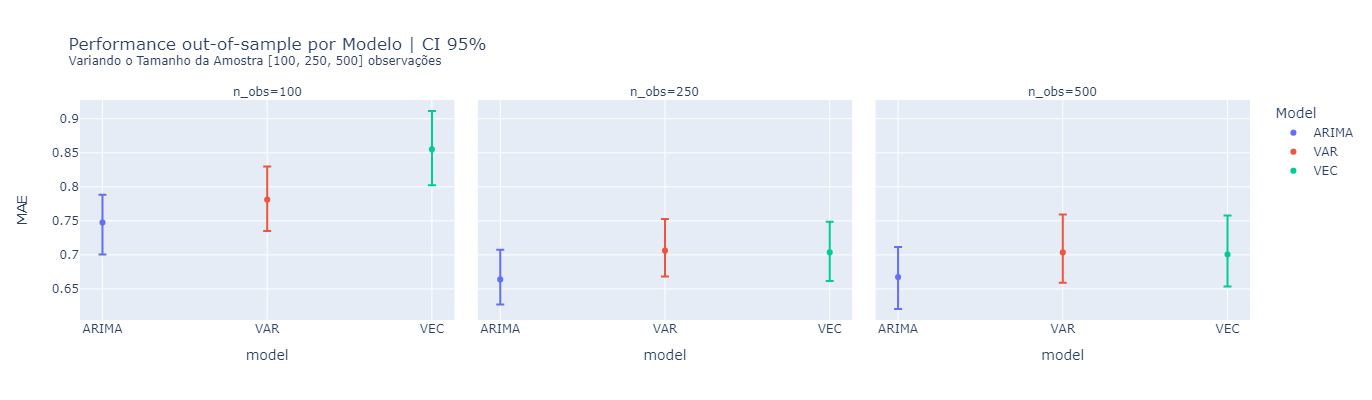

In [9]:
filter_select = (df_MAE.n_ts==3) & (df_MAE.n_ma==0) & (df_MAE.n_fold_ts==85)
boot_df_ci_filter = df_MAE.loc[filter_select].copy()

fig = px.scatter(boot_df_ci_filter, x="model", y="MAE", color="model", facet_col="n_obs",error_y="ci_sup",error_y_minus="ci_inf")
fig.update_layout(width=800, height=400)
fig.update_layout(title="Performance out-of-sample por Modelo | CI 95% <br><sup>Variando o Tamanho da Amostra [100, 250, 500] observações</sup>",legend_title="Model",margin=dict(t=100))
fig.show()

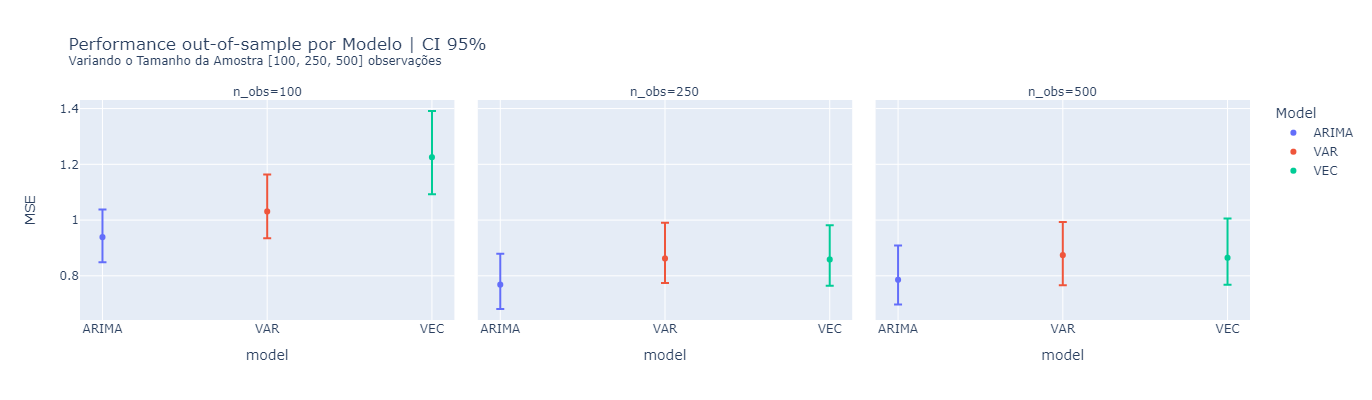

In [10]:
filter_select = (df_MSE.n_ts==3) & (df_MSE.n_ma==0) & (df_MSE.n_fold_ts==85)
boot_df_ci_filter = df_MSE.loc[filter_select].copy()

fig = px.scatter(boot_df_ci_filter, x="model", y="MSE", color="model", facet_col="n_obs",error_y="ci_sup",error_y_minus="ci_inf")
fig.update_layout(width=800, height=400)
fig.update_layout(title="Performance out-of-sample por Modelo | CI 95% <br><sup>Variando o Tamanho da Amostra [100, 250, 500] observações</sup>",legend_title="Model",margin=dict(t=100))
fig.show()

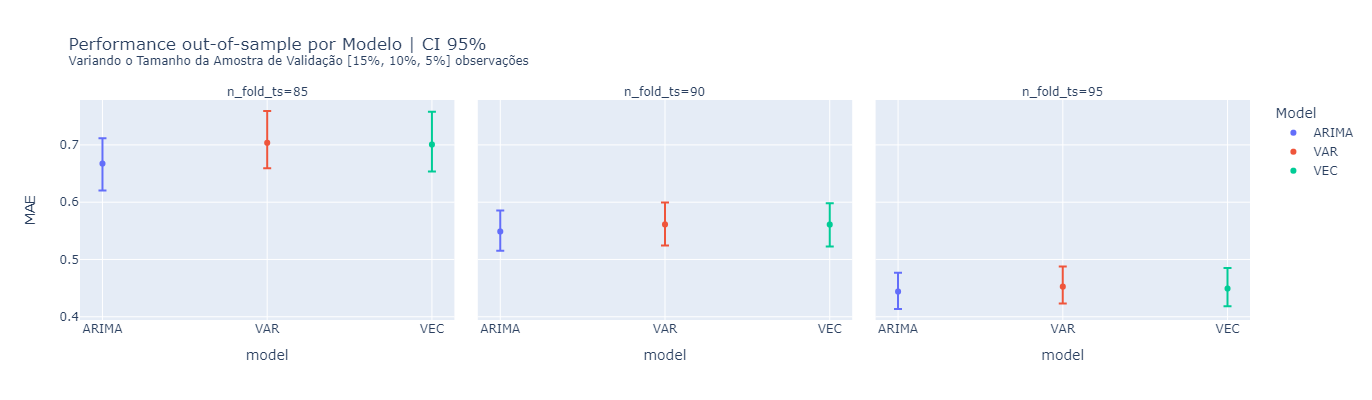

In [14]:
filter_select = (df_MAE.n_ts==3) & (df_MAE.n_ma==0) & (df_MAE.n_obs==500)
boot_df_ci_filter = df_MAE.loc[filter_select].copy()

fig = px.scatter(boot_df_ci_filter, x="model", y="MAE", color="model", facet_col="n_fold_ts",error_y="ci_sup",error_y_minus="ci_inf")
fig.update_layout(width=800, height=400)
fig.update_layout(title="Performance out-of-sample por Modelo | CI 95% <br><sup>Variando o Tamanho da Amostra de Validação [15%, 10%, 5%] observações</sup>",legend_title="Model",margin=dict(t=100))
fig.show()

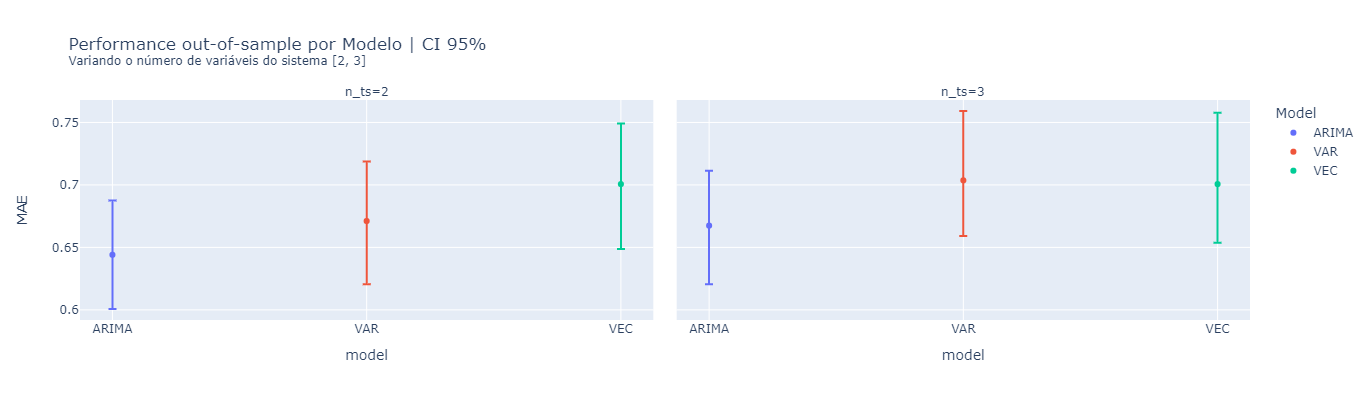

In [15]:
filter_select = (df_MAE.n_fold_ts==85) & (df_MAE.n_ma==0) & (df_MAE.n_obs==500)
boot_df_ci_filter = df_MAE.loc[filter_select].copy()

fig = px.scatter(boot_df_ci_filter, x="model", y="MAE", color="model", facet_col="n_ts",error_y="ci_sup",error_y_minus="ci_inf")
fig.update_layout(width=800, height=400)
fig.update_layout(title="Performance out-of-sample por Modelo | CI 95% <br><sup>Variando o número de variáveis do sistema [2, 3]</sup>",legend_title="Model",margin=dict(t=100))
fig.show()

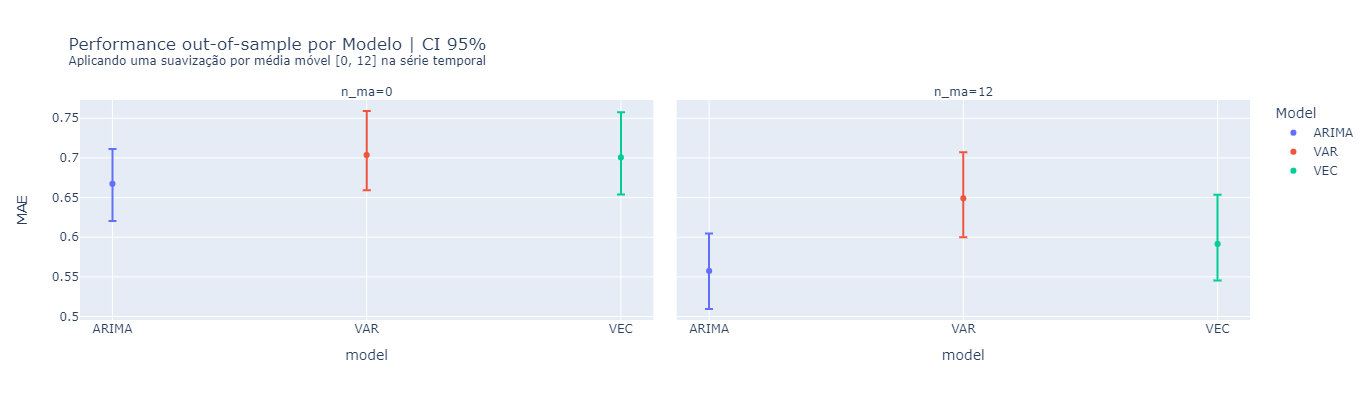

In [16]:
filter_select = (df_MAE.n_ts==3) & (df_MAE.n_fold_ts==85) & (df_MAE.n_obs==500)
boot_df_ci_filter = df_MAE.loc[filter_select].copy()

fig = px.scatter(boot_df_ci_filter, x="model", y="MAE", color="model", facet_col="n_ma",error_y="ci_sup",error_y_minus="ci_inf")
fig.update_layout(width=800, height=400)
fig.update_layout(title="Performance out-of-sample por Modelo | CI 95% <br><sup>Aplicando uma suavização por média móvel [0, 12] na série temporal</sup>",legend_title="Model",margin=dict(t=100))
fig.show()

In [ ]:
filter_select = (df.n_ts==3) & (df.n_ma==0) & (df.n_obs==500)
boot_df_ci_filter = df.loc[filter_select].copy()

fig = px.scatter(boot_df_ci_filter, x="model", y="MAE", color="model", facet_col="n_fold_ts",error_y="ci_sup",error_y_minus="ci_inf")
fig.update_layout(width=800, height=400)
fig.update_layout(title="Performance out-of-sample por Modelo | CI 95% <br><sup>Variando o Tamanho da Amostra de Validação [15%, 10%, 5%] observações</sup>",yaxis_title="MAE",legend_title="Model",margin=dict(t=100))
fig.show()

# OLD

In [ ]:
filter_select = (df.n_ts==3) & (df.n_ma==0)
boot_df_ci_filter = df.loc[filter_select].copy().rename(columns={"mean":"MAE"})

fig = px.scatter(boot_df_ci_filter, x="model", y="MAE", color="model", facet_col="n_fold_ts",facet_row="n_obs",error_y="ci_sup",error_y_minus="ci_inf")
fig.update_layout(width=1200, height=800)
fig.update_layout(title="Performance Fora da Amostra",yaxis_title="MAE",legend_title="Model")
fig.show()

In [ ]:
filter_select = (df.n_ts==3) & (df.n_ma==0)
boot_df_ci_filter = df.loc[filter_select].copy().rename(columns={"mean":"MAE"})

fig = px.scatter(boot_df_ci_filter, x="model", y="MAE", color="model", facet_col="n_fold_ts",facet_row="n_obs",error_y="ci_sup",error_y_minus="ci_inf")
fig.update_layout(width=1200, height=800)
fig.update_layout(title="Models Performance",yaxis_title="MAE",legend_title="Model")
fig.show()

In [ ]:
filter_select = (df.n_fold_ts==95) & (df.n_obs==250)
boot_df_ci_filter = df.loc[filter_select].copy()

fig = px.scatter(boot_df_ci_filter, x="model", y="mean", color="model", facet_col="n_ma",facet_row="n_ts",error_y="ci_sup",error_y_minus="ci_inf")
fig.update_layout(width=1200, height=800)
fig.update_layout(title="Models Performance",yaxis_title="MAE",legend_title="Model")
fig.show()